<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import nltk
nltk.download('book',quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [5]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
carroll_raw = nltk.corpus.gutenberg.raw('carroll-alice.txt')
print(carroll_raw[:100])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was


In [9]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(carroll_raw[:1000])[1])

Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'


In [11]:
from nltk.corpus.reader.tagged import word_tokenize
from nltk.tokenize import word_tokenize
print(word_tokenize(carroll_raw[:100]))

['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was']


In [13]:
from nltk.tokenize import RegexpTokenizer
retoken = RegexpTokenizer('[\w]+') #정규표현식
retoken.tokenize(carroll_raw[:100])

['Alice',
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 'CHAPTER',
 'I',
 'Down',
 'the',
 'Rabbit',
 'Hole',
 'Alice',
 'was']

In [14]:
from nltk.stem import PorterStemmer,LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['working', 'works', 'worded']

for temp in words:
  print(st1.stem(temp))

work
work
word


In [15]:
for temp in words:
  print(st2.stem(temp))

work
work
word


In [17]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
for temp in words:
  print(lm.lemmatize(temp,pos='v'))

work
work
word


In [18]:
from nltk.stem import WordNetLemmatizer
words = ['fly', 'flies', 'flying']
lm = WordNetLemmatizer()
for temp in words:
  print(lm.lemmatize(temp,pos='v'))

fly
fly
fly


In [20]:
from nltk.tag import pos_tag
sentence = "Alice's Adventures in Wonderland by Lewis Carroll 1865"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Alice', 'NNP'),
 ("'s", 'POS'),
 ('Adventures', 'NNS'),
 ('in', 'IN'),
 ('Wonderland', 'NNP'),
 ('by', 'IN'),
 ('Lewis', 'NNP'),
 ('Carroll', 'NNP'),
 ('1865', 'CD')]

In [21]:
noun_list = [ t[0] for t in tagged_list if t[1]=='NNP'] #튜플이니까 단어==[0] 저장
noun_list

['Alice', 'Wonderland', 'Lewis', 'Carroll']

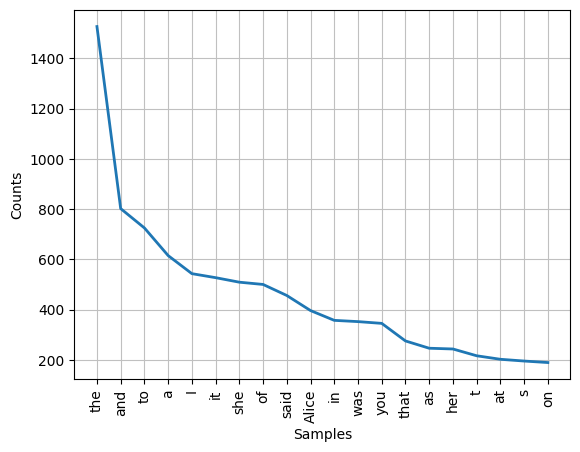

<Axes: xlabel='Samples', ylabel='Counts'>

In [22]:
from nltk import Text
text = Text(retoken.tokenize(carroll_raw))
text.plot(20)

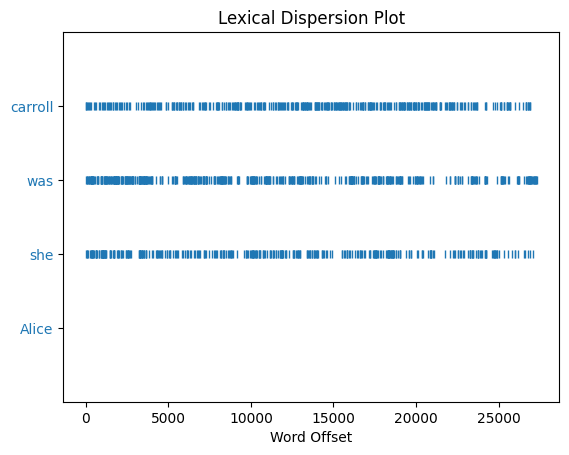

In [23]:
text.dispersion_plot(['Alice', 'she', 'was', 'carroll'])

In [24]:
text.concordance('Alice')

Displaying 25 of 398 matches:
 Alice s Adventures in Wonderland by Lewis 
 1865 CHAPTER I Down the Rabbit Hole Alice was beginning to get very tired of s
nd what is the use of a book thought Alice without pictures or conversation So 
g so VERY remarkable in that nor did Alice think it so VERY much out of the way
and looked at it and then hurried on Alice started to her feet for it flashed a
he hedge In another moment down went Alice after it never once considering how 
ipped suddenly down so suddenly that Alice had not a moment to think about stop
rds as she fell past it Well thought Alice to herself after such a fall as this
usand miles down I think for you see Alice had learnt several things of this so
at Latitude or Longitude I ve got to Alice had no idea what Latitude was or Lon
down There was nothing else to do so Alice soon began talking again Dinah ll mi
t do cats eat bats I wonder And here Alice began to get rather sleepy and went 
and dry leaves and the fall was over Alice was

In [25]:
text.similar('Alice')

she it her they he this herself them all speak get and say begin do be
that see one go


In [26]:
text.common_contexts(['Alice', 'she'])

and_was and_looked that_had and_s when_had but_had so_went and_could
and_thought and_heard as_could that_could know_had moment_appeared
so_began time_had moment_felt


In [28]:
Fd = text.vocab()

In [29]:
from nltk import FreqDist
stopwords = ['Mr.','Mrs.','Miss','Mr','Mrs','Dear']
carroll_tokens = pos_tag(retoken.tokenize(carroll_raw))
name_list = [t[0] for t in carroll_tokens if t[1]== 'NNP' and t[0] not in stopwords]
name_list

['Alice',
 'Adventures',
 'Wonderland',
 'Lewis',
 'Carroll',
 'Rabbit',
 'Hole',
 'Alice',
 'Alice',
 'White',
 'Alice',
 'Rabbit',
 'Oh',
 'Oh',
 'Rabbit',
 'A',
 'WATCH',
 'OUT',
 'OF',
 'ITS',
 'WAISTCOAT',
 'POCKET',
 'Alice',
 'Alice',
 'Alice',
 'First',
 'ORANGE',
 'MARMALADE',
 'Well',
 'Alice',
 'Which',
 'Down',
 'NEVER',
 'Alice',
 'Latitude',
 'Longitude',
 'Alice',
 'Latitude',
 'Longitude',
 'Presently',
 'How',
 'WAS',
 'Please',
 'Ma',
 'New',
 'Zealand',
 'Australia',
 'CURTSEYING',
 'No',
 'Down',
 'Alice',
 'Dinah',
 'Dinah',
 'Dinah',
 'Alice',
 'Do',
 'Do',
 'Dinah',
 'Dinah',
 'Alice',
 'White',
 'Rabbit',
 'Alice',
 'Oh',
 'Rabbit',
 'Alice',
 'Alice',
 'Alice',
 'How',
 'Alice',
 'Oh',
 'Alice',
 'Alice',
 'DRINK',
 'ME',
 'Drink',
 'Alice',
 'No',
 'NOT',
 'Alice',
 'Alice',
 'First',
 'Alice',
 'Alice',
 'Come',
 'Alice',
 'Alice',
 'Soon',
 'EAT',
 'ME',
 'Well',
 'Alice',
 'Which',
 'Which',
 'Alice',
 'CHAPTER',
 'II',
 'Pool',
 'Tears',
 'Curiouser',
 'Al

In [30]:
fd_names = FreqDist(name_list)
fd_names.N()

1981

In [32]:
fd_names['Alice']

391

In [34]:
fd_names.freq('Alice')

0.19737506309944472

In [35]:
fd_names.most_common(5)

[('Alice', 391), ('Queen', 73), ('King', 60), ('Turtle', 58), ('Mock', 56)]